In [1]:
!pip install geopandas==0.8.1
!pip install pyshp==2.1.2
!pip install shapely==1.7.1
!pip install plotly-geo==1.0.0

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import os

In [4]:
# os.environ을 이용하여 Kaggle API Username, Key 세팅하기
os.environ['KAGGLE_USERNAME'] = 'topwhales'
os.environ['KAGGLE_KEY'] = '6195915f86973065e22f52eb31dc832a'

In [5]:
# Linux 명령어로 Kaggle API를 이용하여 데이터셋 다운로드하기 (!kaggle ~)
# Linux 명령어로 압축 해제하기
!kaggle datasets download -d unanimad/us-election-2020
!kaggle datasets download -d muonneutrino/us-census-demographic-data
!unzip '*.zip'

us-election-2020.zip: Skipping, found more recently modified local copy (use --force to force download)
us-census-demographic-data.zip: Skipping, found more recently modified local copy (use --force to force download)


unzip:  cannot find any matches for wildcard specification "'*.zip'".

No zipfiles found.


In [6]:
# from US Election 2020
df_pres = pd.read_csv('president_county_candidate.csv')
df_gov = pd.read_csv('governors_county_candidate.csv')

# from US Census 2017
df_census = pd.read_csv('acs2017_county_data.csv')

In [7]:
# State Code 관련 부가 자료
state_code = pd.read_html('https://www.infoplease.com/us/postal-information/state-abbreviations-and-state-postal-codes')[0]

In [8]:
# DataFrame에서 제공하는 메소드를 이용하여 각 데이터프레임의 구조 분석하기 (head(), info(), describe())
df_pres.head()

,state,county,candidate,party,total_votes,won
0,Delaware,Kent County,Joe Biden,DEM,44552,True
1,Delaware,Kent County,Donald Trump,REP,41009,False
2,Delaware,Kent County,Jo Jorgensen,LIB,1044,False
3,Delaware,Kent County,Howie Hawkins,GRN,420,False
4,Delaware,New Castle County,Joe Biden,DEM,195034,True


In [9]:
df_pres['candidate'].unique()

array(['Joe Biden', 'Donald Trump', 'Jo Jorgensen', 'Howie Hawkins',
       ' Write-ins', 'Gloria La Riva', 'Brock Pierce',
       'Rocky De La Fuente', 'Don Blankenship', 'Kanye West',
       'Brian Carroll', 'Ricki Sue King', 'Jade Simmons',
       'President Boddie', 'Bill Hammons', 'Tom Hoefling',
       'Alyson Kennedy', 'Jerome Segal', 'Phil Collins',
       ' None of these candidates', 'Sheila Samm Tittle', 'Dario Hunter',
       'Joe McHugh', 'Christopher LaFontaine', 'Keith McCormic',
       'Brooke Paige', 'Gary Swing', 'Richard Duncan', 'Blake Huber',
       'Kyle Kopitke', 'Zachary Scalf', 'Jesse Ventura', 'Connie Gammon',
       'John Richard Myers', 'Mark Charles', 'Princess Jacob-Fambro',
       'Joseph Kishore', 'Jordan Scott'], dtype=object)

In [10]:
df_gov.head()

,state,county,candidate,party,votes,won
0,Delaware,Kent County,John Carney,DEM,44352,True
1,Delaware,Kent County,Julianne Murray,REP,39332,False
2,Delaware,Kent County,Kathy DeMatteis,IPD,1115,False
3,Delaware,Kent County,John Machurek,LIB,616,False
4,Delaware,New Castle County,John Carney,DEM,191678,True


In [11]:
df_census.head()

,CountyId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga County,55036,26899,28137,2.7,75.4,18.9,0.3,...,0.6,1.3,2.5,25.8,24112,74.1,20.2,5.6,0.1,5.2
1,1003,Alabama,Baldwin County,203360,99527,103833,4.4,83.1,9.5,0.8,...,0.8,1.1,5.6,27.0,89527,80.7,12.9,6.3,0.1,5.5
2,1005,Alabama,Barbour County,26201,13976,12225,4.2,45.7,47.8,0.2,...,2.2,1.7,1.3,23.4,8878,74.1,19.1,6.5,0.3,12.4
3,1007,Alabama,Bibb County,22580,12251,10329,2.4,74.6,22.0,0.4,...,0.3,1.7,1.5,30.0,8171,76.0,17.4,6.3,0.3,8.2
4,1009,Alabama,Blount County,57667,28490,29177,9.0,87.4,1.5,0.3,...,0.4,0.4,2.1,35.0,21380,83.9,11.9,4.0,0.1,4.9


In [12]:
df_census['County'].value_counts()

Washington County    30
Jefferson County     25
Franklin County      24
Jackson County       23
Lincoln County       23
                     ..
Nantucket County      1
Hampden County        1
Dukes County          1
Berkshire County      1
Yauco Municipio       1
Name: County, Length: 1955, dtype: int64

In [13]:
state_code.head()

,State Name/District,Postal Abbreviation,Postal Code
0,Alabama,Ala.,AL
1,Alaska,Alaska,AK
2,Arizona,Ariz.,AZ
3,Arkansas,Ark.,AR
4,California,Calif.,CA


In [14]:
# 모든 데이터프레임의 index를 county로 변경하기

data = df_pres.loc[df_pres['party'].apply(lambda s: str(s) in ['DEM', 'REP'])]
table_pres = pd.pivot_table(data=data, index=['state', 'county'], columns='party', values='total_votes')
table_pres.rename({'DEM': 'Pres_DEM', 'REP': 'Pres_REP'}, axis=1, inplace=True)
table_pres

party                      Pres_DEM  Pres_REP
state   county                               
Alabama Autauga County         7503     19838
        Baldwin County        24578     83544
        Barbour County         4816      5622
        Bibb County            1986      7525
        Blount County          2640     24711
...                             ...       ...
Wyoming Sweetwater County      3823     12229
        Teton County           9848      4341
        Uinta County           1591      7496
        Washakie County         651      3245
        Weston County           360      3107

[4633 rows x 2 columns]

In [15]:
data = df_gov.loc[df_gov['party'].apply(lambda s: str(s) in ['DEM', 'REP'])]
table_gov = pd.pivot_table(data=data, index=['state', 'county'], columns='party', values='votes')
table_gov.rename({'DEM': 'Gov_DEM', 'REP': 'Gov_REP'}, axis=1, inplace=True)
table_gov

party                            Gov_DEM  Gov_REP
state         county                             
Delaware      Kent County          44352    39332
              New Castle County   191678    82545
              Sussex County        56873    68435
Indiana       Adams County          2143     9441
              Allen County         53895    98406
...                                  ...      ...
West Virginia Webster County         659     2552
              Wetzel County         1727     4559
              Wirt County            483     1947
              Wood County           9933    26232
              Wyoming County        1240     6941

[1025 rows x 2 columns]

In [16]:
df_census.rename({'State': 'state', 'County':'county'}, axis=1, inplace=True)
df_census.drop('CountyId', axis=1, inplace=True)
df_census.set_index(['state', 'county'], inplace=True)
df_census

TotalPop    Men   Women  Hispanic  White  \
state       county                                                          
Alabama     Autauga County          55036  26899   28137       2.7   75.4   
            Baldwin County         203360  99527  103833       4.4   83.1   
            Barbour County          26201  13976   12225       4.2   45.7   
            Bibb County             22580  12251   10329       2.4   74.6   
            Blount County           57667  28490   29177       9.0   87.4   
...                                   ...    ...     ...       ...    ...   
Puerto Rico Vega Baja Municipio     54754  26269   28485      96.7    3.1   
            Vieques Municipio        8931   4351    4580      95.7    4.0   
            Villalba Municipio      23659  11510   12149      99.7    0.2   
            Yabucoa Municipio       35025  16984   18041      99.9    0.1   
            Yauco Municipio         37585  18052   19533      99.8    0.2   

                                 Black  Native  Asian  Pacific  \
state       county                                               
Alabama     Autauga County        18.9     0.3    0.9      0.0   
            Baldwin County         9.5     0.8    0.7      0.0   
            Barbour County        47.8     0.2    0.6      0.0   
            Bibb County           22.0     0.4    0.0      0.0   
            Blount County          1.5     0.3    0.1      0.0   
...                                ...     ...    ...      ...   
Puerto Rico Vega Baja Municipio    0.1     0.0    0.0      0.0   
            Vieques Municipio      0.0     0.0    0.0      0.0   
            Villalba Municipio     0.1     0.0    0.0      0.0   
            Yabucoa Municipio      0.0     0.0    0.0      0.0   
            Yauco Municipio        0.0     0.0    0.0      0.0   

                                 VotingAgeCitizen  ...  Walk  OtherTransp  \
state       county                                 ...                      
Alabama     Autauga County                  41016  ...   0.6          1.3   
            Baldwin County                 155376  ...   0.8          1.1   
            Barbour County                  20269  ...   2.2          1.7   
            Bibb County                     17662  ...   0.3          1.7   
            Blount County                   42513  ...   0.4          0.4   
...                                           ...  ...   ...          ...   
Puerto Rico Vega Baja Municipio             42838  ...   1.4          0.6   
            Vieques Municipio                7045  ...   5.0          0.0   
            Villalba Municipio              18053  ...   2.1          0.0   
            Yabucoa Municipio               27523  ...   1.4          1.8   
            Yauco Municipio                 29763  ...   1.7          0.1   

                                 WorkAtHome  MeanCommute  Employed  \
state       county                                                   
Alabama     Autauga County              2.5         25.8     24112   
            Baldwin County              5.6         27.0     89527   
            Barbour County              1.3         23.4      8878   
            Bibb County                 1.5         30.0      8171   
            Blount County               2.1         35.0     21380   
...                                     ...          ...       ...   
Puerto Rico Vega Baja Municipio         0.9         31.6     14234   
            Vieques Municipio           1.7         14.9      2927   
            Villalba Municipio          2.8         28.4      6873   
            Yabucoa Municipio           0.1         30.5      7878   
            Yauco Municipio             5.0         24.4      8995   

                                 PrivateWork  PublicWork  SelfEmployed  \
state       county                                                       
Alabama     Autauga County              74.1        20.2           5.6   
            Baldwin County           

In [17]:
df_census.columns

Index(['TotalPop', 'Men', 'Women', 'Hispanic', 'White', 'Black', 'Native',
       'Asian', 'Pacific', 'VotingAgeCitizen', 'Income', 'IncomeErr',
       'IncomePerCap', 'IncomePerCapErr', 'Poverty', 'ChildPoverty',
       'Professional', 'Service', 'Office', 'Construction', 'Production',
       'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp', 'WorkAtHome',
       'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork', 'SelfEmployed',
       'FamilyWork', 'Unemployment'],
      dtype='object')

In [18]:
df_census.drop(['Income', 'IncomeErr', 'IncomePerCapErr'], axis=1, inplace=True)

In [19]:
df_census.drop('Women', axis=1, inplace=True)

In [20]:
df_census['Men'] /= df_census['TotalPop']

In [21]:
df_census['VotingAgeCitizen'] /= df_census['TotalPop']

In [22]:
df_census['Employed'] /= df_census['TotalPop']

In [23]:
df_census.head()

TotalPop       Men  Hispanic  White  Black  Native  \
state   county                                                               
Alabama Autauga County     55036  0.488753       2.7   75.4   18.9     0.3   
        Baldwin County    203360  0.489413       4.4   83.1    9.5     0.8   
        Barbour County     26201  0.533415       4.2   45.7   47.8     0.2   
        Bibb County        22580  0.542560       2.4   74.6   22.0     0.4   
        Blount County      57667  0.494043       9.0   87.4    1.5     0.3   

                        Asian  Pacific  VotingAgeCitizen  IncomePerCap  ...  \
state   county                                                          ...   
Alabama Autauga County    0.9      0.0          0.745258         27824  ...   
        Baldwin County    0.7      0.0          0.764044         29364  ...   
        Barbour County    0.6      0.0          0.773596         17561  ...   
        Bibb County       0.0      0.0          0.782197         20911  ...   
        Blount County     0.1      0.0          0.737215         22021  ...   

                        Walk  OtherTransp  WorkAtHome  MeanCommute  Employed  \
state   county                                                                 
Alabama Autauga County   0.6          1.3         2.5         25.8  0.438113   
        Baldwin County   0.8          1.1         5.6         27.0  0.440239   
        Barbour County   2.2          1.7         1.3         23.4  0.338842   
        Bibb County      0.3          1.7         1.5         30.0  0.361869   
        Blount County    0.4          0.4         2.1         35.0  0.370749   

                        PrivateWork  PublicWork  SelfEmployed  FamilyWork  \
state   county                                                              
Alabama Autauga County         74.1        20.2           5.6         0.1   
        Baldwin County         80.7        12.9           6.3         0.1   
        Barbour County         74.1        19.1           6.5         0.3   
        Bibb County            76.0        17.4           6.3         0.3   
        Blount County          83.9        11.9           4.0         0.1   

                        Unemployment  
state   county                        
Alabama Autauga County           5.2  
        Baldwin County           5.5  
        Barbour County          12.4  
        Bibb County              8.2  
        Blount County            4.9  

[5 rows x 30 columns]

In [24]:
# df_pres, df_gov, df_census 데이터프레임을 하나로 결합하기
df = pd.concat([table_pres, table_gov, df_census], axis=1)

In [25]:
df

Pres_DEM  Pres_REP  Gov_DEM  Gov_REP  \
state       county                                                      
Alabama     Autauga County         7503.0   19838.0      NaN      NaN   
            Baldwin County        24578.0   83544.0      NaN      NaN   
            Barbour County         4816.0    5622.0      NaN      NaN   
            Bibb County            1986.0    7525.0      NaN      NaN   
            Blount County          2640.0   24711.0      NaN      NaN   
...                                   ...       ...      ...      ...   
Puerto Rico Vega Baja Municipio       NaN       NaN      NaN      NaN   
            Vieques Municipio         NaN       NaN      NaN      NaN   
            Villalba Municipio        NaN       NaN      NaN      NaN   
            Yabucoa Municipio         NaN       NaN      NaN      NaN   
            Yauco Municipio           NaN       NaN      NaN      NaN   

                                 TotalPop       Men  Hispanic  White  Black  \
state       county                                                            
Alabama     Autauga County        55036.0  0.488753       2.7   75.4   18.9   
            Baldwin County       203360.0  0.489413       4.4   83.1    9.5   
            Barbour County        26201.0  0.533415       4.2   45.7   47.8   
            Bibb County           22580.0  0.542560       2.4   74.6   22.0   
            Blount County         57667.0  0.494043       9.0   87.4    1.5   
...                                   ...       ...       ...    ...    ...   
Puerto Rico Vega Baja Municipio   54754.0  0.479764      96.7    3.1    0.1   
            Vieques Municipio      8931.0  0.487179      95.7    4.0    0.0   
            Villalba Municipio    23659.0  0.486496      99.7    0.2    0.1   
            Yabucoa Municipio     35025.0  0.484911      99.9    0.1    0.0   
            Yauco Municipio       37585.0  0.480298      99.8    0.2    0.0   

                                 Native  ...  Walk  OtherTransp  WorkAtHome  \
state       county                       ...                                  
Alabama     Autauga County          0.3  ...   0.6          1.3         2.5   
            Baldwin County          0.8  ...   0.8          1.1         5.6   
            Barbour County          0.2  ...   2.2          1.7         1.3   
            Bibb County             0.4  ...   0.3          1.7         1.5   
            Blount County           0.3  ...   0.4          0.4         2.1   
...                                 ...  ...   ...          ...         ...   
Puerto Rico Vega Baja Municipio     0.0  ...   1.4          0.6         0.9   
            Vieques Municipio       0.0  ...   5.0          0.0         1.7   
            Villalba Municipio      0.0  ...   2.1          0.0         2.8   
            Yabucoa Municipio       0.0  ...   1.4          1.8         0.1   
            Yauco Municipio         0.0  ...   1.7          0.1         5.0   

                                 MeanCommute  Employed  PrivateWork  \
state       county                                                    
Alabama     Autauga County              25.8  0.438113         74.1   
            Baldwin County              27.0  0.440239         80.7   
            Barbour County              23.4  0.338842         74.1   
            Bibb County                 30.0  0.361869         76.0   
            Blount County               35.0  0.370749         83.9   
...                                      ...       ...          ...   
Puerto Rico Vega Baja Municipio         31.6  0.259963         76.2   
            Vieques Municipio           14.9  0.327735         40.7   
            Villalba Municipio          28.4  0.290503         59.2   
            Yabucoa Municipio           30.5  0.224925         62.7   
            Yauco Municipio             24.4  0.239324         66.4   

                                 PublicWork  SelfEmployed  FamilyWork  \
state       county            

### 문제 7. 컬럼간의 Correlation을 Heatmap으로 표현하기


<AxesSubplot:>

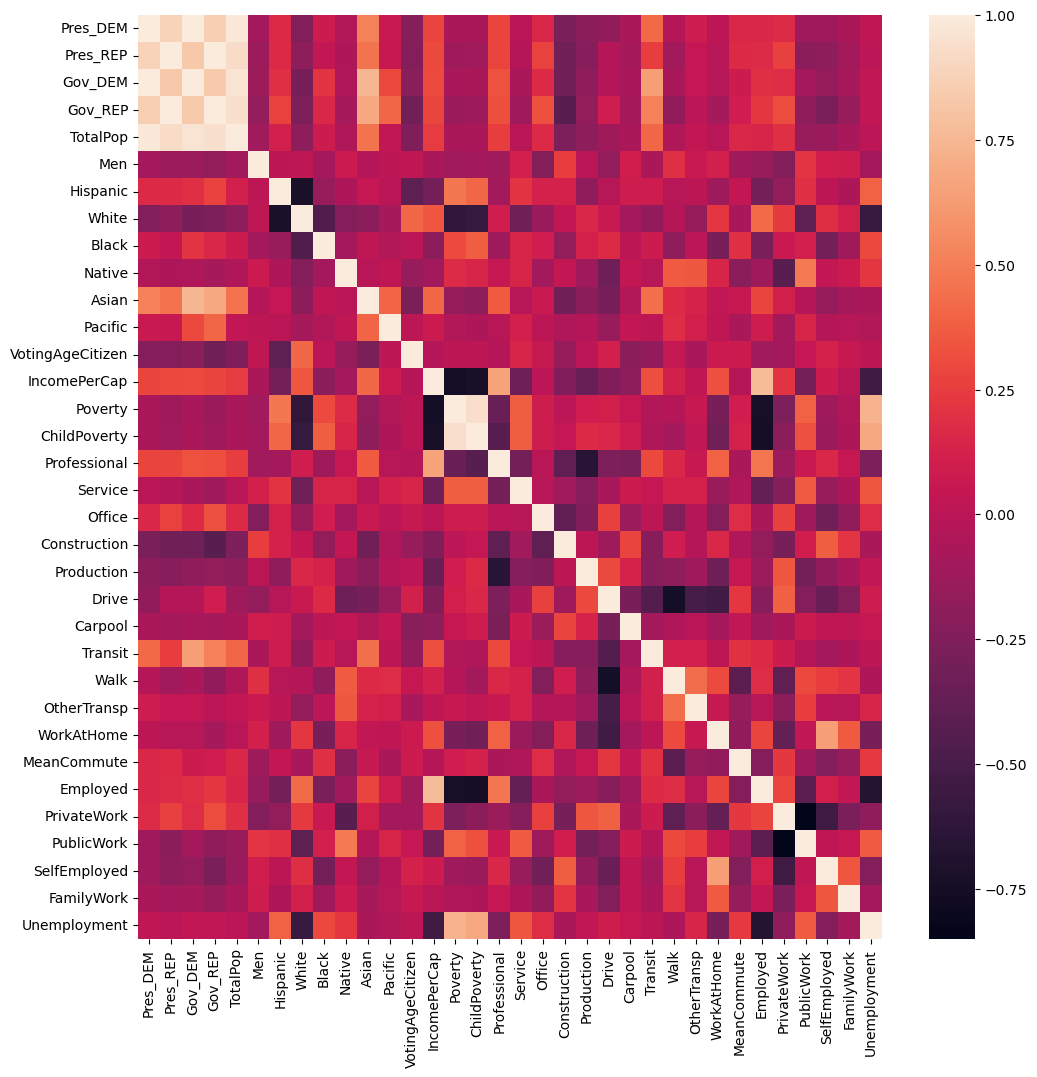

In [26]:
# DataFrame의 corr() 메소드와 Seaborn의 heatmap() 메소드를 이용하여 Pearson's correlation 시각화하기
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr())

<AxesSubplot:>

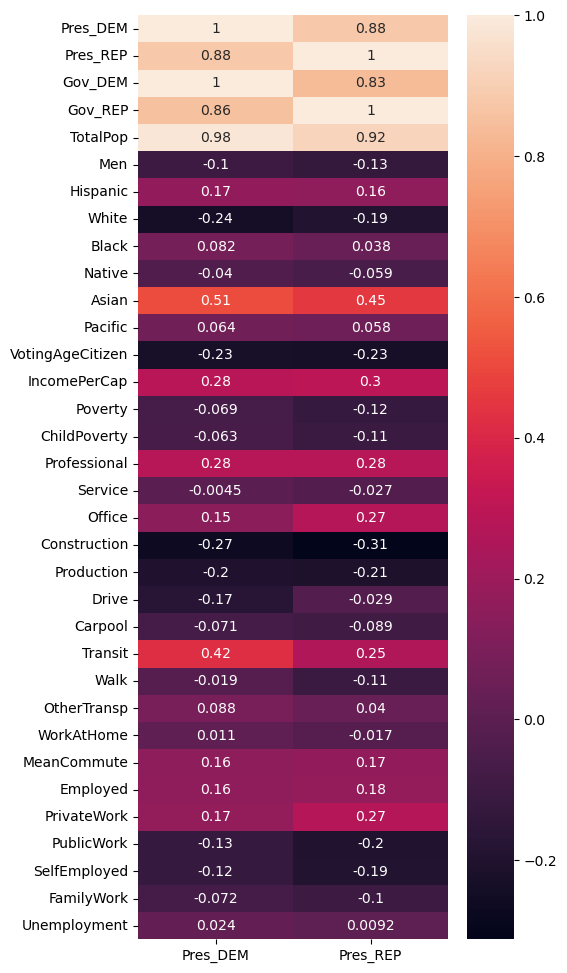

In [27]:
# DataFrame의 corr() 메소드와 Seaborn의 heatmap() 메소드를 이용하여 Pearson's correlation 시각화하기
plt.figure(figsize=(5, 12))
sns.heatmap(df.corr()[['Pres_DEM', 'Pres_REP']], annot=True)

In [28]:
df_norm = df.copy()

In [29]:
df_norm['Pres_DEM'] /= df['Pres_DEM'] + df['Pres_REP']
df_norm['Pres_REP'] /= df['Pres_DEM'] + df['Pres_REP']
df_norm['Gov_DEM'] /= df['Gov_DEM'] + df['Gov_REP']
df_norm['Gov_REP'] /= df['Gov_DEM'] + df['Gov_REP']

<AxesSubplot:>

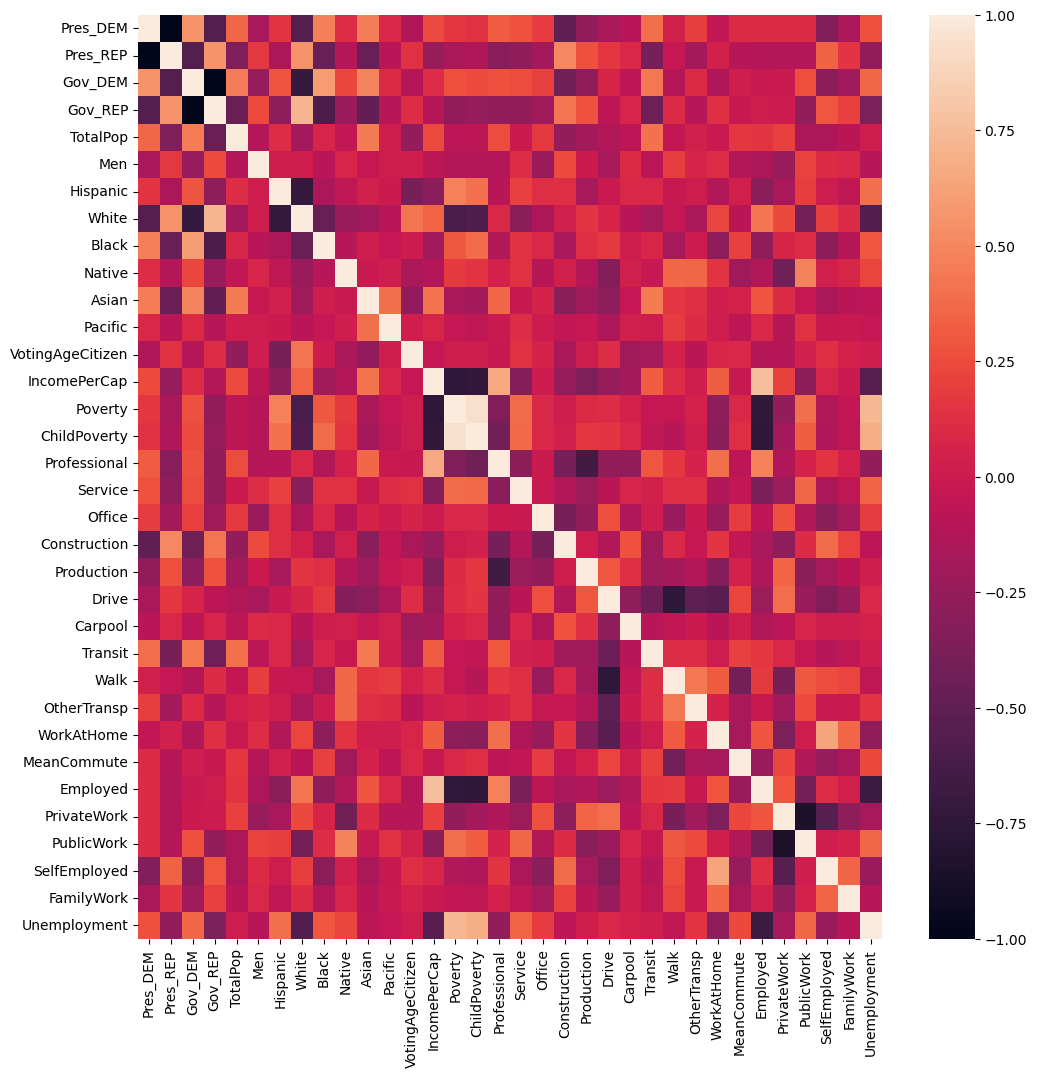

In [30]:
# normalize된 데이터로 다시 correation 확인
plt.figure(figsize=(12, 12))
sns.heatmap(df_norm.corr())

<AxesSubplot:>

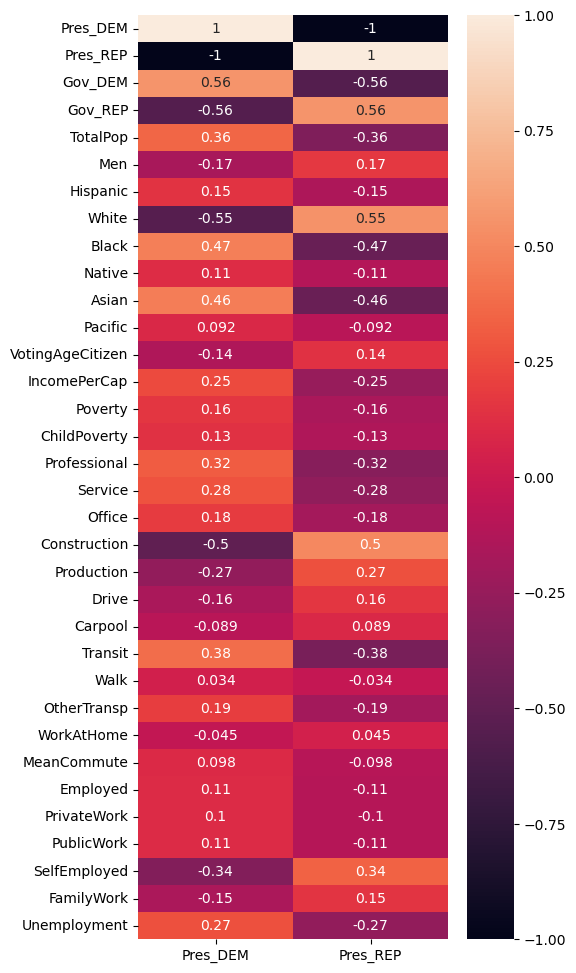

In [31]:
plt.figure(figsize=(5, 12))
sns.heatmap(df_norm.corr()[['Pres_DEM', 'Pres_REP']], annot=True)

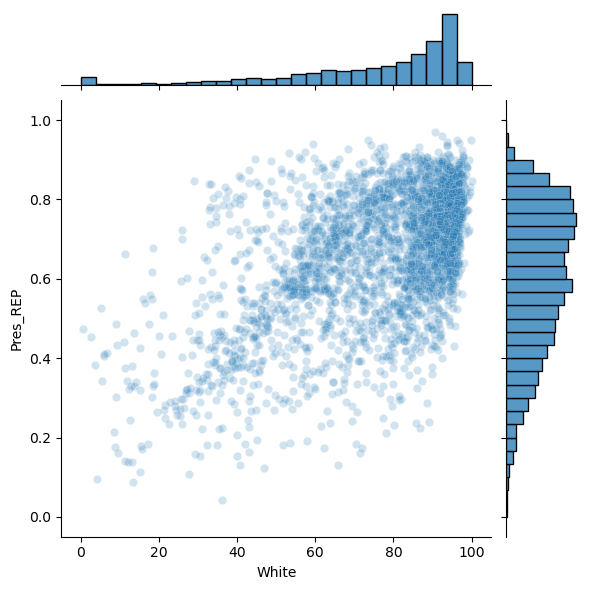

In [32]:
sns.jointplot(x='White', y='Pres_REP', data=df_norm, alpha=0.2)

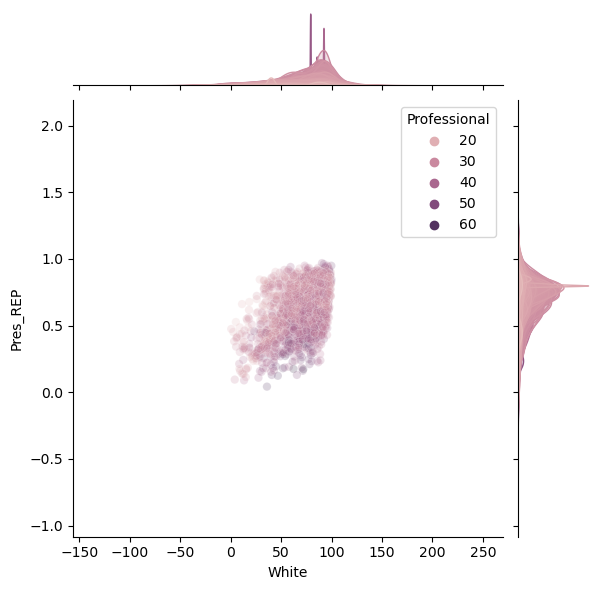

In [33]:
sns.jointplot(x='White', y='Pres_REP', hue='Professional', data=df_norm, alpha=0.2)
plt.show()

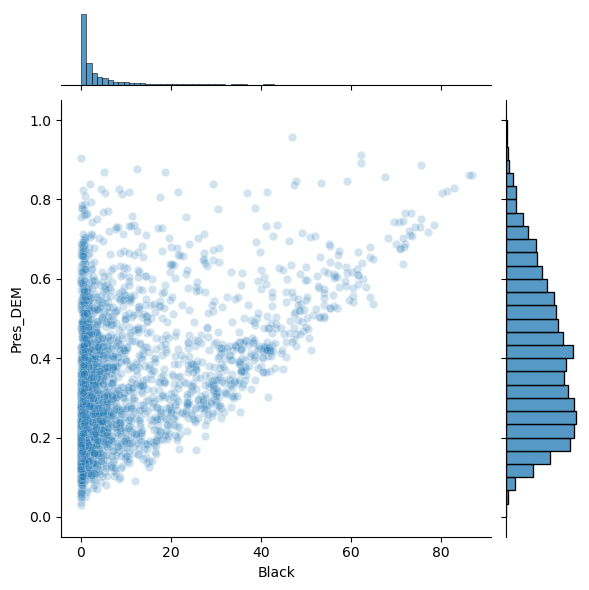

In [34]:
sns.jointplot(x='Black', y='Pres_DEM', data=df_norm, alpha=0.2)

In [35]:
import plotly.figure_factory as ff

# FIPS 코드 불러오기
df_sample = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/laucnty16.csv')
df_sample['State FIPS Code'] = df_sample['State FIPS Code'].apply(lambda x: str(x).zfill(2))
df_sample['County FIPS Code'] = df_sample['County FIPS Code'].apply(lambda x: str(x).zfill(3))
df_sample['FIPS'] = df_sample['State FIPS Code'] + df_sample['County FIPS Code']

# Color Scale 세팅
colorscale = ["#f7fbff","#ebf3fb","#deebf7","#d2e3f3","#c6dbef","#b3d2e9","#9ecae1",
              "#85bcdb","#6baed6","#57a0ce","#4292c6","#3082be","#2171b5","#1361a9",
              "#08519c","#0b4083","#08306b"]

Error importing optional module geopandas
Traceback (most recent call last):
  File "C:\Users\munin\anaconda\lib\site-packages\_plotly_utils\optional_imports.py", line 30, in get_module
    return import_module(name)
  File "C:\Users\munin\anaconda\lib\importlib\__init__.py", line 127, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
  File "<frozen importlib._bootstrap>", line 1030, in _gcd_import
  File "<frozen importlib._bootstrap>", line 1007, in _find_and_load
  File "<frozen importlib._bootstrap>", line 986, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 680, in _load_unlocked
  File "<frozen importlib._bootstrap_external>", line 850, in exec_module
  File "<frozen importlib._bootstrap>", line 228, in _call_with_frames_removed
  File "C:\Users\munin\anaconda\lib\site-packages\geopandas\__init__.py", line 3, in <module>
    from geopandas.geoseries import GeoSeries  # noqa
  File "C:\Users\munin\anaconda\lib\site-packages\g

In [36]:
df_sample.head()

,LAUS Code,State FIPS Code,County FIPS Code,County Name/State Abbreviation,Year,Labor Force,Employed,Unemployed,Unemployment Rate (%),FIPS
0,CN0100100000000,01,001,"Autauga County, AL",2016,"25,649","24,297","1,352",5.3,01001
1,CN0100300000000,01,003,"Baldwin County, AL",2016,"89,931","85,061","4,870",5.4,01003
2,CN0100500000000,01,005,"Barbour County, AL",2016,"8,302","7,584",718,8.6,01005
3,CN0100700000000,01,007,"Bibb County, AL",2016,"8,573","8,004",569,6.6,01007
4,CN0100900000000,01,009,"Blount County, AL",2016,"24,525","23,171","1,354",5.5,01009


In [37]:
state_code.head()

,State Name/District,Postal Abbreviation,Postal Code
0,Alabama,Ala.,AL
1,Alaska,Alaska,AK
2,Arizona,Ariz.,AZ
3,Arkansas,Ark.,AR
4,California,Calif.,CA


In [38]:
state_map = state_code.set_index('State Name/District')['Postal Code']

In [39]:
counties = df_norm.reset_index()['county'] + ', ' + df_norm.reset_index()['state'].map(state_map)

In [40]:
counties_to_fips = df_sample.set_index('County Name/State Abbreviation')['FIPS']

In [41]:
fips = counties.map(counties_to_fips)

In [42]:
fips

0       01001
1       01003
2       01005
3       01007
4       01009
        ...  
4804      NaN
4805      NaN
4806      NaN
4807      NaN
4808      NaN
Length: 4809, dtype: object

In [43]:
df_norm.columns

Index(['Pres_DEM', 'Pres_REP', 'Gov_DEM', 'Gov_REP', 'TotalPop', 'Men',
       'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific',
       'VotingAgeCitizen', 'IncomePerCap', 'Poverty', 'ChildPoverty',
       'Professional', 'Service', 'Office', 'Construction', 'Production',
       'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp', 'WorkAtHome',
       'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork', 'SelfEmployed',
       'FamilyWork', 'Unemployment'],
      dtype='object')

In [44]:
# 투표 결과에 해당하는 데이터는 입력 데이터에서 제거한다.
# 예측 타겟은 DEM vs. REP 투표 비율로 한다.
df_norm.dropna(inplace=True)
X = df_norm.drop(['Pres_DEM', 'Pres_REP', 'Gov_DEM', 'Gov_REP'], axis=1)
y = df_norm['Pres_DEM']

In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
# StandardScaler를 이용해 수치형 데이터를 표준화하기
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X = pd.DataFrame(data=X_scaled, index=X.index, columns=X.columns)

In [47]:
X.head()

TotalPop       Men  Hispanic     White     Black  \
state    county                                                                
Delaware Kent County        0.651462 -0.946145  0.346057 -1.423723  1.751813   
         New Castle County  3.043033 -0.848175  0.828313 -1.695454  1.751813   
         Sussex County      0.917027 -0.818852  0.759420 -0.634409  0.622026   
Indiana  Adams County      -0.213551 -0.230718 -0.067305  0.581911 -0.432442   
         Allen County       1.870146 -0.656809  0.414951 -0.653818  0.546706   

                              Native     Asian   Pacific  VotingAgeCitizen  \
state    county                                                              
Delaware Kent County       -0.191121  0.783427 -0.393531         -0.388638   
         New Castle County -0.239442  3.218819 -0.393531         -0.665857   
         Sussex County     -0.215282  0.210394 -0.393531          0.227859   
Indiana  Adams County      -0.263602 -0.362639 -0.393531         -1.625095   
         Allen County      -0.239442  1.857865 -0.393531         -1.068441   

                            IncomePerCap  ...      Walk  OtherTransp  \
state    county                           ...                          
Delaware Kent County            0.313498  ... -0.455170    -0.337372   
         New Castle County      1.606755  ... -0.301446    -0.337372   
         Sussex County          1.122397  ... -0.506412    -0.141175   
Indiana  Adams County          -0.755470  ... -0.250204     0.447416   
         Allen County           0.224871  ... -0.608895    -0.533569   

                            WorkAtHome  MeanCommute  Employed  PrivateWork  \
state    county                                                              
Delaware Kent County         -0.325794     0.608072  0.209912    -0.063847   
         New Castle County   -0.325794     0.492385  0.801126     1.168959   
         Sussex County        0.055883     0.415259 -0.026356     0.503244   
Indiana  Adams County        -0.244006    -0.066773 -0.205611     0.971710   
         Allen County        -0.380320    -0.355993  0.707837     1.477161   

                            PublicWork  SelfEmployed  FamilyWork  Unemployment  
state    county                                                                 
Delaware Kent County          0.791294     -0.836585   -0.243581      0.265911  
         New Castle County   -0.715528     -0.999491   -0.404976      0.192397  
         Sussex County       -0.251891     -0.470046   -0.404976      0.045370  
Indiana  Adams County        -1.344751     -0.001691    0.401999     -0.285443  
         Allen County        -1.278517     -0.816222   -0.404976      0.118884  

[5 rows x 30 columns]

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
# train_test_split() 함수로 학습 데이터와 테스트 데이터 분리하기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [50]:
from sklearn.decomposition import PCA

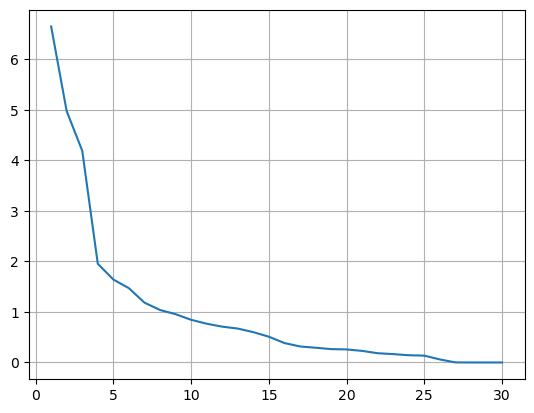

In [51]:
# PCA를 이용해 Dimensionality Reduction 수행하기
pca = PCA()
pca.fit(X_train)
plt.plot(range(1, len(pca.explained_variance_) + 1), pca.explained_variance_)
plt.grid()

In [52]:
pca = PCA(n_components=5)
pca.fit(X_train)

PCA(n_components=5)

In [53]:
from lightgbm import LGBMRegressor

In [54]:
# LGBMRegressor 모델 생성/학습. Feature에 PCA 적용하기
model_reg = LGBMRegressor()
# model_reg.fit(pca.transform(X_train), y_train)
model_reg.fit(X_train, y_train)

LGBMRegressor()

In [55]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import classification_report
from math import sqrt

In [56]:
# Predict를 수행하고 mean_absolute_error, rmse, classification_report 결과 출력하기
# pred = model_reg.predict(pca.transform(X_test))
pred = model_reg.predict(X_test)
print(mean_absolute_error(y_test, pred))
print(sqrt(mean_squared_error(y_test, pred)))
print(classification_report(y_test > 0.5, pred > 0.5))

0.053261679672733014
0.07527410114651
              precision    recall  f1-score   support

       False       0.97      0.98      0.97       146
        True       0.80      0.71      0.75        17

    accuracy                           0.95       163
   macro avg       0.88      0.84      0.86       163
weighted avg       0.95      0.95      0.95       163



In [57]:
from xgboost import XGBClassifier

In [58]:
# XGBClassifier 모델 생성/학습
model_cls = XGBClassifier()
model_cls.fit(X_train, y_train > 0.5)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

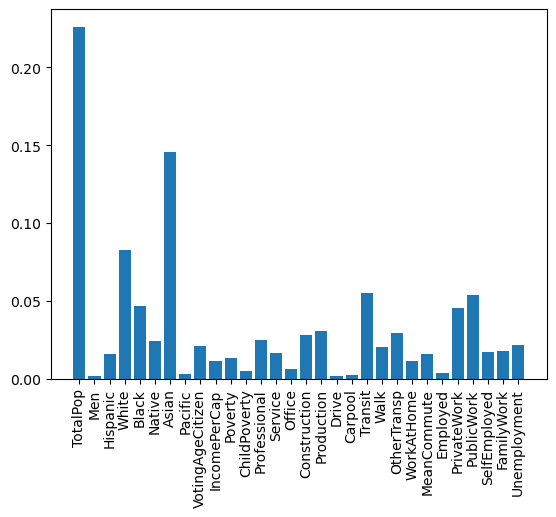

In [59]:
# XGBClassifier 모델의 feature_importances_ 속성 시각화
plt.bar(X.columns, model_cls.feature_importances_)
plt.xticks(rotation=90)
plt.show()

In [60]:
# Predict를 수행하고 classification_report() 결과 출력하기
pred = model_cls.predict(X_test)
print(classification_report(y_test > 0.5, pred))

              precision    recall  f1-score   support

       False       0.96      0.97      0.97       146
        True       0.73      0.65      0.69        17

    accuracy                           0.94       163
   macro avg       0.85      0.81      0.83       163
weighted avg       0.94      0.94      0.94       163

